# Kaggle Data EDA And Analysis ex1

[사용 데이터](https://www.kaggle.com/mkechinov/ecommerce-purchase-history-from-electronics-store)

In [2]:
import numpy as np
import pandas as pd
import os

# load data
df = pd.read_csv('kz.csv')
df.head()

C:\Users\82104\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


event_time             order_id           product_id  \
0  2020-04-24 11:50:39 UTC  2294359932054536986  1515966223509089906   
1  2020-04-24 11:50:39 UTC  2294359932054536986  1515966223509089906   
2  2020-04-24 14:37:43 UTC  2294444024058086220  2273948319057183658   
3  2020-04-24 14:37:43 UTC  2294444024058086220  2273948319057183658   
4  2020-04-24 19:16:21 UTC  2294584263154074236  2273948316817424439   

    category_id                category_code    brand   price       user_id  
0  2.268105e+18           electronics.tablet  samsung  162.01  1.515916e+18  
1  2.268105e+18           electronics.tablet  samsung  162.01  1.515916e+18  
2  2.268105e+18  electronics.audio.headphone   huawei   77.52  1.515916e+18  
3  2.268105e+18  electronics.audio.headphone   huawei   77.52  1.515916e+18  
4  2.268105e+18                          NaN  karcher  217.57  1.515916e+18

# Cleaning The Data

In [4]:
df.set_index('order_id', inplace=True)

In [6]:
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

category_id       431954
category_code     612202
brand             506005
price             431954
user_id          2069352
dtype: int64

In [7]:
n_unique_products = df['product_id'].nunique()
n_unique_users = df['user_id'].nunique()
print('Number of unique users: ' + str(n_unique_users) +'. Number of unique products is: ' + str(n_unique_products))

Number of unique users: 98262. Number of unique products is: 25113


In [9]:
df['event_time']=pd.to_datetime(df['event_time'])

In [10]:
df.dropna(subset=['category_code'],inplace=True)

In [11]:
#Getting the main category from the category_code
df['category'] = df['category_code'].str.rsplit('.', n=1, expand=True)[1]
df.drop(columns=['category_code'], inplace=True)
df.sample(20)

event_time           product_id  \
order_id                                                             
2379507689844638531 2020-08-19 10:16:32+00:00  1515966223510545617   
2348823530155540771 2020-03-22 12:14:51+00:00  1515966223509090232   
2348771459171614924 2020-01-12 07:09:14+00:00  1515966223509106822   
2357453049338790752 2020-07-20 13:05:24+00:00  1515966223513916260   
2353261133348995525 2020-06-13 06:43:43+00:00  1515966223509260293   
2370078662381798223 2020-08-06 10:52:20+00:00  1515966223509122646   
2353261691375976694 2020-06-13 06:52:37+00:00  1515966223509088565   
2388440981134642137 2020-10-28 14:47:49+00:00  1515966223509104345   
2348785565932978178 2020-02-02 13:45:31+00:00  1515966223509105905   
2348823105926857254 2020-03-20 10:54:54+00:00  1515966223509089642   
2348822030775746584 2020-03-20 11:57:28+00:00  1515966223527092062   
2388440981134382570 2020-09-01 08:31:56+00:00  1515966223512562046   
2348826580991607277 2020-03-24 06:01:03+00:00  2273948223016010561   
2353234044805709945 2020-05-26 11:27:45+00:00  1515966223523303321   
2348788563560104054 2020-02-07 10:45:45+00:00  1515966223509300537   
2348787169113407827 2020-02-06 13:52:47+00:00  2273948226245624761   
2372439702826385602 2020-08-10 05:21:13+00:00  1515966223509089056   
2371231291262632049 2020-08-08 13:20:19+00:00  1515966223509104086   
2348791236237722120 2020-02-09 11:27:38+00:00  1515966223510545617   
2348827501842661957 2020-03-30 08:40:18+00:00  2273948319057183658   

                      category_id      brand    price       user_id  \
order_id                                                              
2379507689844638531           NaN        NaN      NaN           NaN   
2348823530155540771  2.268105e+18     lenovo   694.42           NaN   
2348771459171614924  2.268105e+18       oppo   268.26           NaN   
2357453049338790752  2.360742e+18        ava   196.74  1.515916e+18   
2353261133348995525  2.268105e+18        NaN    17.34           NaN   
2370078662381798223  2.268105e+18    maxwell    18.50  1.515916e+18   
2353261691375976694  2.374499e+18    samsung   381.92           NaN   
2388440981134642137  2.268105e+18   scarlett    12.71  1.515916e+18   
2348785565932978178  2.268105e+18    philips    41.64           NaN   
2348823105926857254  2.268105e+18        ava    43.96           NaN   
2348822030775746584           NaN        NaN      NaN           NaN   
2388440981134382570  2.268105e+18    samsung   416.64           NaN   
2348826580991607277  2.268105e+18   microlab    18.50           NaN   
2353234044805709945           NaN        NaN      NaN           NaN   
2348788563560104054  2.268105e+18     lenovo  1157.38           NaN   
2348787169113407827  2.268105e+18  transcend     4.61           NaN   
2372439702826385602  2.268105e+18       oppo   115.49  1.515916e+18   
2371231291262632049  2.268105e+18      apple  1337.71  1.515916e+18   
2348791236237722120           NaN        NaN      NaN           NaN   
2348827501842661957  2.268105e+18     huawei    77.52           NaN   

                            category  
order_id                              
2379507689844638531               00  
2348823530155540771         notebook  
2348771459171614924       smartphone  
2357453049338790752  air_conditioner  
2353261133348995525            table  
2370078662381798223           toster  
2353261691375976694               tv  
2388440981134642137           scales  
2348785565932978178           kettle  
2348823105926857254        microwave  
2348822030775746584               50  
2388440981134382570           tablet  
2348826580991607277         notebook  
2353234044805709945               18  
2348788563560104054         notebook  
2348787169113407827              bag  
2372439702826385602       smartphone  
2371231291262632049         notebook  
2348791236237722120               00  
2348827501842661957        headphone

# EDA

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2021319 entries, 2294359932054536986 to 2388440981134693944
Data columns (total 7 columns):
 #   Column       Dtype              
---  ------       -----              
 0   event_time   datetime64[ns, UTC]
 1   product_id   int64              
 2   category_id  float64            
 3   brand        object             
 4   price        float64            
 5   user_id      float64            
 6   category     object             
dtypes: datetime64[ns, UTC](1), float64(3), int64(1), object(2)
memory usage: 123.4+ MB


In [13]:
df['event_time'].groupby(df['event_time'].dt.day).count().plot(kind='line')

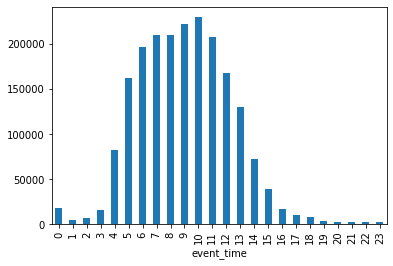

In [14]:
df['event_time'].groupby(df['event_time'].dt.hour).count().plot(kind='bar')

## (1) Best Performing Brands

In [15]:
import plotly.express as px
import plotly.graph_objs as go

In [16]:
best_performing_brands = df.groupby('brand')['price'].sum().reset_index().sort_values('price', ascending=False).head(10)
fig = px.bar(
    best_performing_brands, 
    x='brand', 
    y='price', 
    title='Best performing brands',
    width=800, 
    height=800
)

fig.show()

## (2) Most Sold brands

In [17]:
most_sold_brands = df.groupby('brand')['price'].agg('count').reset_index().sort_values('price', ascending=False).head(10)
most_sold_brands.rename(columns={"brand": "brand", "price": "times_sold"}, inplace=True)

fig = px.bar(
    most_sold_brands, 
    x='brand', 
    y='times_sold', 
    title='Most sold brands',
    width=800, 
    height=800
)

fig.show()

## (3) Most Sold Category

In [18]:
#most bought categories
most_sold_categories = df.groupby('category')['price'].agg('count').reset_index().sort_values('price', ascending=False).head(10)
most_sold_categories.rename(columns={"category": "category", "price": "times_sold"}, inplace=True)

fig = px.bar(
    most_sold_categories, 
    x='category', 
    y='times_sold', 
    title='Most sold categories',
    width=800, 
    height=800
)

fig.show()

## (4) 10% and 90% of Top Buyer

In [22]:
# How much money spent 20% of top buyers in comparison with other 80% of clients
most_active_users = df.groupby('user_id')['price'].sum().reset_index().sort_values('price', ascending=False).head(round((df['user_id'].nunique())*0.1))
least_active_users = df.groupby('user_id')['price'].sum().reset_index().sort_values('price', ascending=False).tail(round((df['user_id'].nunique())*0.9))
top_10_percent_buyers = most_active_users['price'].sum()
bottom_90_percent_buyers = least_active_users['price'].sum()
last_data = pd.DataFrame(data={'most_active': [most_active_users['price'].sum()], 'least_active': [least_active_users['price'].sum()]})

fig = px.bar(
    last_data,  
    title="10% of most active in comparison with other 90% of buyers", 
    width=800, 
    height=800
)

fig.show()

## (5) User & Brand, User & Time

In [23]:
user_brand = df.groupby(['user_id','brand'])['price'].sum().reset_index().sort_values('price', ascending=False)
user_brand.head(20)

user_id    brand     price
217930  1.515916e+18  samsung  47996.47
140714  1.515916e+18  samsung  47514.63
198771  1.515916e+18       hp  39416.41
224153  1.515916e+18    apple  38862.80
13842   1.515916e+18  samsung  38590.69
216687  1.515916e+18  samsung  38135.13
226210  1.515916e+18  samsung  35439.51
158366  1.515916e+18  samsung  30577.89
225517  1.515916e+18    apple  30388.99
218367  1.515916e+18       lg  30275.28
200858  1.515916e+18    apple  29977.95
141488  1.515916e+18   casada  29814.68
194979  1.515916e+18     asus  29166.30
209634  1.515916e+18  samsung  29143.64
59236   1.515916e+18  samsung  28865.34
216780  1.515916e+18  samsung  28791.80
112716  1.515916e+18  samsung  28696.34
210362  1.515916e+18  samsung  27669.26
206170  1.515916e+18  samsung  26990.91
216661  1.515916e+18   lenovo  26017.06

In [25]:
df['user_id'] = df.user_id - 1.51916e18
df.head()

event_time           product_id  \
order_id                                                             
2294359932054536986 2020-04-24 11:50:39+00:00  1515966223509089906   
2294359932054536986 2020-04-24 11:50:39+00:00  1515966223509089906   
2294444024058086220 2020-04-24 14:37:43+00:00  2273948319057183658   
2294444024058086220 2020-04-24 14:37:43+00:00  2273948319057183658   
2295716521449619559 2020-04-26 08:45:57+00:00  1515966223509261697   

                      category_id    brand   price       user_id   category  
order_id                                                                     
2294359932054536986  2.268105e+18  samsung  162.01 -3.244375e+15     tablet  
2294359932054536986  2.268105e+18  samsung  162.01 -3.244375e+15     tablet  
2294444024058086220  2.268105e+18   huawei   77.52 -3.244375e+15  headphone  
2294444024058086220  2.268105e+18   huawei   77.52 -3.244375e+15  headphone  
2295716521449619559  2.268105e+18  maestro   39.33 -3.244375e+15      table

In [26]:
df['user_id'] = df.user_id+3.244375e15
df.head()

event_time           product_id  \
order_id                                                             
2294359932054536986 2020-04-24 11:50:39+00:00  1515966223509089906   
2294359932054536986 2020-04-24 11:50:39+00:00  1515966223509089906   
2294444024058086220 2020-04-24 14:37:43+00:00  2273948319057183658   
2294444024058086220 2020-04-24 14:37:43+00:00  2273948319057183658   
2295716521449619559 2020-04-26 08:45:57+00:00  1515966223509261697   

                      category_id    brand   price      user_id   category  
order_id                                                                    
2294359932054536986  2.268105e+18  samsung  162.01  441993984.0     tablet  
2294359932054536986  2.268105e+18  samsung  162.01  441993984.0     tablet  
2294444024058086220  2.268105e+18   huawei   77.52  447879424.0  headphone  
2294444024058086220  2.268105e+18   huawei   77.52  447879424.0  headphone  
2295716521449619559  2.268105e+18  maestro   39.33  450382848.0      table

In [28]:
user_brand = df.groupby(['user_id','brand'])['price'].sum().reset_index().sort_values('price', ascending=False)
user_brand.sample(20)

user_id      brand    price
68657   464293632.0  transcend    10.39
154639  495635200.0       vivo   150.44
37011   451093248.0        ava    13.87
110105  484617472.0   camelion     6.01
220511  513072384.0      apple   856.23
226397  513874176.0      apple  1215.25
110022  484616960.0      vitek     9.24
134485  486713344.0    dogland    36.39
162982  497865472.0     xiaomi   231.46
209712  512284416.0    tp-link    70.99
81068   470235392.0     huawei   254.61
22462   445532416.0     huawei   231.23
16080   443591936.0      vitek    67.11
54075   458131968.0     x-game    11.55
162734  497837056.0         lg   787.00
118397  484653824.0    tp-link   171.62
108739  484534528.0       beko   203.68
152330  495075072.0     xiaomi   196.27
20525   444817152.0       ship     9.24
209813  512296960.0  different    27.74

In [29]:
df['user_id'].nunique()

91624

In [31]:
df.head(20)

event_time           product_id  \
order_id                                                             
2294359932054536986 2020-04-24 11:50:39+00:00  1515966223509089906   
2294359932054536986 2020-04-24 11:50:39+00:00  1515966223509089906   
2294444024058086220 2020-04-24 14:37:43+00:00  2273948319057183658   
2294444024058086220 2020-04-24 14:37:43+00:00  2273948319057183658   
2295716521449619559 2020-04-26 08:45:57+00:00  1515966223509261697   
2295740594749702229 2020-04-26 09:33:47+00:00  1515966223509104892   
2295740594749702229 2020-04-26 09:33:47+00:00  1515966223509104892   
2295740594749702229 2020-04-26 09:33:47+00:00  1515966223509104892   
2295740594749702229 2020-04-26 09:33:47+00:00  1515966223509104892   
2295902490203259134 2020-04-26 14:55:26+00:00  2273948311742316796   
2296164324487463110 2020-04-26 23:35:39+00:00  1515966223509259473   
2296400480990920715 2020-04-27 07:24:51+00:00  2273948308663698152   
2296628237930857206 2020-04-27 14:57:22+00:00  1515966223509089660   
2296628237930857206 2020-04-27 14:57:22+00:00  1515966223509089660   
2296628237930857206 2020-04-27 14:57:22+00:00  1515966223509089660   
2297016008231092565 2020-04-28 03:47:48+00:00  1515966223509089780   
2297174044555871159 2020-04-28 09:01:47+00:00  2273948222957290212   
2297174044555871159 2020-04-28 09:01:47+00:00  2273948222957290212   
2297252054407578606 2020-04-28 11:36:47+00:00  2273948303177548033   
2297252054407578606 2020-04-28 11:36:47+00:00  2273948303177548033   

                      category_id    brand    price      user_id  \
order_id                                                           
2294359932054536986  2.268105e+18  samsung   162.01  441993984.0   
2294359932054536986  2.268105e+18  samsung   162.01  441993984.0   
2294444024058086220  2.268105e+18   huawei    77.52  447879424.0   
2294444024058086220  2.268105e+18   huawei    77.52  447879424.0   
2295716521449619559  2.268105e+18  maestro    39.33  450382848.0   
2295740594749702229  2.268105e+18    apple  1387.01  448766464.0   
2295740594749702229  2.268105e+18    apple  1387.01  448766464.0   
2295740594749702229  2.268105e+18    apple  1387.01  448766464.0   
2295740594749702229  2.268105e+18    apple  1387.01  448766464.0   
2295902490203259134  2.268105e+18       lg   462.94  450561280.0   
2296164324487463110  2.268105e+18  polaris    30.07  446798336.0   
2296400480990920715  2.374499e+18  samsung   416.64  450899456.0   
2296628237930857206  2.268105e+18    intel    91.41  451131648.0   
2296628237930857206  2.268105e+18    intel    91.41  451131648.0   
2296628237930857206  2.268105e+18    intel    91.41  451131648.0   
2297016008231092565  2.268105e+18     asus   509.24  443158784.0   
2297174044555871159  2.268105e+18  samsung   254.61  442675200.0   
2297174044555871159  2.268105e+18  samsung   254.61  442675200.0   
2297252054407578606  2.268105e+18    epson   164.33  450916864.0   
2297252054407578606  2.268105e+18    epson   164.33  450916864.0   

                          category  
order_id                            
2294359932054536986         tablet  
2294359932054536986         tablet  
2294444024058086220      headphone  
2294444024058086220      headphone  
2295716521449619559          table  
2295740594749702229     smartphone  
2295740594749702229     smartphone  
2295740594749702229     smartphone  
2295740594749702229     smartphone  
2295902490203259134  refrigerators  
2296164324487463110         scales  
2296400480990920715             tv  
2296628237930857206            cpu  
2296628237930857206            cpu  
2296628237930857206            cpu  
2297016008231092565       notebook  
2297174044555871159        monitor  
2297174044555871159        monitor  
2297252054407578606        printer  
2297252054407578606        printer

## (6) Brand 간 상관관계 분석

In [36]:
pdf1 = pd.pivot_table(df,
                     index = 'user_id',
                     columns = 'brand',
                     values = 'price',
                     aggfunc = 'sum')
pdf1

brand        acana  adguard  aeg  aerocool  agu  aiko  aimoto  airline  aist  \
user_id                                                                        
439952128.0    NaN      NaN  NaN       NaN  NaN   NaN     NaN      NaN   NaN   
440038400.0    NaN      NaN  NaN       NaN  NaN   NaN     NaN      NaN   NaN   
440051456.0    NaN      NaN  NaN       NaN  NaN   NaN     NaN      NaN   NaN   
440099840.0    NaN      NaN  NaN       NaN  NaN   NaN     NaN      NaN   NaN   
440121600.0    NaN      NaN  NaN       NaN  NaN   NaN     NaN      NaN   NaN   
...            ...      ...  ...       ...  ...   ...     ...      ...   ...   
514887424.0    NaN      NaN  NaN       NaN  NaN   NaN     NaN      NaN   NaN   
514887936.0    NaN      NaN  NaN       NaN  NaN   NaN     NaN      NaN   NaN   
514888704.0    NaN      NaN  NaN       NaN  NaN   NaN     NaN      NaN   NaN   
514891008.0    NaN      NaN  NaN       NaN  NaN   NaN     NaN      NaN   NaN   
514891264.0    NaN      NaN  NaN       NaN  NaN   NaN     NaN      NaN   NaN   

brand        akitio  ...  zala  zalman  zenit  zeppelin  zeta  zevs  zhorka  \
user_id              ...                                                      
439952128.0     NaN  ...   NaN     NaN    NaN       NaN   NaN   NaN     NaN   
440038400.0     NaN  ...   NaN     NaN    NaN       NaN   NaN   NaN     NaN   
440051456.0     NaN  ...   NaN     NaN    NaN       NaN   NaN   NaN     NaN   
440099840.0     NaN  ...   NaN     NaN    NaN       NaN   NaN   NaN     NaN   
440121600.0     NaN  ...   NaN     NaN    NaN       NaN   NaN   NaN     NaN   
...             ...  ...   ...     ...    ...       ...   ...   ...     ...   
514887424.0     NaN  ...   NaN     NaN    NaN       NaN   NaN   NaN     NaN   
514887936.0     NaN  ...   NaN     NaN    NaN       NaN   NaN   NaN     NaN   
514888704.0     NaN  ...   NaN     NaN    NaN       NaN   NaN   NaN     NaN   
514891008.0     NaN  ...   NaN     NaN    NaN       NaN   NaN   NaN     NaN   
514891264.0     NaN  ...   NaN     NaN    NaN       NaN   NaN   NaN     NaN   

brand        zlatek  zowie  zwilling  
user_id                               
439952128.0     NaN    NaN       NaN  
440038400.0     NaN    NaN       NaN  
440051456.0     NaN    NaN       NaN  
440099840.0     NaN    NaN       NaN  
440121600.0     NaN    NaN       NaN  
...             ...    ...       ...  
514887424.0     NaN    NaN       NaN  
514887936.0     NaN    NaN       NaN  
514888704.0     NaN    NaN       NaN  
514891008.0     NaN    NaN       NaN  
514891264.0     NaN    NaN       NaN  

[90800 rows x 570 columns]

In [38]:
pdf1 = pdf1.replace(np.nan, 0)
pdf1

brand        acana  adguard  aeg  aerocool  agu  aiko  aimoto  airline  aist  \
user_id                                                                        
439952128.0    0.0      0.0  0.0       0.0  0.0   0.0     0.0      0.0   0.0   
440038400.0    0.0      0.0  0.0       0.0  0.0   0.0     0.0      0.0   0.0   
440051456.0    0.0      0.0  0.0       0.0  0.0   0.0     0.0      0.0   0.0   
440099840.0    0.0      0.0  0.0       0.0  0.0   0.0     0.0      0.0   0.0   
440121600.0    0.0      0.0  0.0       0.0  0.0   0.0     0.0      0.0   0.0   
...            ...      ...  ...       ...  ...   ...     ...      ...   ...   
514887424.0    0.0      0.0  0.0       0.0  0.0   0.0     0.0      0.0   0.0   
514887936.0    0.0      0.0  0.0       0.0  0.0   0.0     0.0      0.0   0.0   
514888704.0    0.0      0.0  0.0       0.0  0.0   0.0     0.0      0.0   0.0   
514891008.0    0.0      0.0  0.0       0.0  0.0   0.0     0.0      0.0   0.0   
514891264.0    0.0      0.0  0.0       0.0  0.0   0.0     0.0      0.0   0.0   

brand        akitio  ...  zala  zalman  zenit  zeppelin  zeta  zevs  zhorka  \
user_id              ...                                                      
439952128.0     0.0  ...   0.0     0.0    0.0       0.0   0.0   0.0     0.0   
440038400.0     0.0  ...   0.0     0.0    0.0       0.0   0.0   0.0     0.0   
440051456.0     0.0  ...   0.0     0.0    0.0       0.0   0.0   0.0     0.0   
440099840.0     0.0  ...   0.0     0.0    0.0       0.0   0.0   0.0     0.0   
440121600.0     0.0  ...   0.0     0.0    0.0       0.0   0.0   0.0     0.0   
...             ...  ...   ...     ...    ...       ...   ...   ...     ...   
514887424.0     0.0  ...   0.0     0.0    0.0       0.0   0.0   0.0     0.0   
514887936.0     0.0  ...   0.0     0.0    0.0       0.0   0.0   0.0     0.0   
514888704.0     0.0  ...   0.0     0.0    0.0       0.0   0.0   0.0     0.0   
514891008.0     0.0  ...   0.0     0.0    0.0       0.0   0.0   0.0     0.0   
514891264.0     0.0  ...   0.0     0.0    0.0       0.0   0.0   0.0     0.0   

brand        zlatek  zowie  zwilling  
user_id                               
439952128.0     0.0    0.0       0.0  
440038400.0     0.0    0.0       0.0  
440051456.0     0.0    0.0       0.0  
440099840.0     0.0    0.0       0.0  
440121600.0     0.0    0.0       0.0  
...             ...    ...       ...  
514887424.0     0.0    0.0       0.0  
514887936.0     0.0    0.0       0.0  
514888704.0     0.0    0.0       0.0  
514891008.0     0.0    0.0       0.0  
514891264.0     0.0    0.0       0.0  

[90800 rows x 570 columns]

In [59]:
# Function to get Highest Corr Category list
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=20):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print(get_top_abs_correlations(pdf1, 50))

brand     brand    
gemon     simba        1.000000
anon      ride         1.000000
alpina    lange        1.000000
oma       sportop      0.965476
jonsbo    patriot      0.832677
artberry  staedtler    0.694372
jandeks   stinger      0.662303
patriot   toshiba      0.648829
awax      ivi          0.613507
chicco    nuk          0.604690
samsung   tefal        0.596221
jonsbo    toshiba      0.596196
philips   tefal        0.596168
gamemax   patriot      0.577151
celebrat  lamart       0.574452
jonsbo    svc          0.567552
audac     procab       0.566230
lg        samsung      0.560682
oppo      samsung      0.555685
          tefal        0.555640
moulinex  tefal        0.553531
awax      eset         0.552452
gamemax   jonsbo       0.550785
philips   samsung      0.550599
camelion  tefal        0.544176
eset      oppo         0.544132
gamemax   kingston     0.533761
patriot   svc          0.528608
gamemax   toshiba      0.527455
scarlett  tefal        0.519076
camelion  samsung   

#### 결과 분석
- 상관관계가 1인 브랜드 간 관계가 존재
- 상관관계가 0.6인 브랜드 역시 다수 존재
- samsung & tefal ?
- patriot & toshiba ?

## (7) Category 간 상관관계 분석

In [39]:
pdf2 = pd.pivot_table(df,
                     index = 'user_id',
                     columns = 'category',
                     values = 'price',
                     aggfunc = 'sum')
pdf2

category     acoustic  air_conditioner  air_heater  alarm  anti_freeze  bag  \
user_id                                                                       
439952128.0       NaN              NaN         NaN    NaN          NaN  NaN   
440038400.0       NaN              NaN         NaN    NaN          NaN  NaN   
440051456.0       NaN              NaN         NaN    NaN          NaN  NaN   
440099840.0       NaN              NaN         NaN    NaN          NaN  NaN   
440121600.0       NaN           138.87         NaN    NaN          NaN  NaN   
...               ...              ...         ...    ...          ...  ...   
514887424.0       NaN              NaN         NaN    NaN          NaN  NaN   
514887936.0       NaN              NaN         NaN    NaN          NaN  NaN   
514888704.0       NaN              NaN         NaN    NaN          NaN  NaN   
514891008.0       NaN              NaN         NaN    NaN          NaN  NaN   
514891264.0       NaN              NaN         NaN    NaN          NaN  NaN   

category     bath  battery  bed  bicycle  ...  umbrella  vacuum    video  \
user_id                                   ...                              
439952128.0   NaN      NaN  NaN      NaN  ...       NaN     NaN      NaN   
440038400.0   NaN      NaN  NaN      NaN  ...       NaN     NaN      NaN   
440051456.0   NaN      NaN  NaN      NaN  ...       NaN     NaN      NaN   
440099840.0   NaN      NaN  NaN      NaN  ...       NaN     NaN  1144.65   
440121600.0   NaN      NaN  NaN      NaN  ...       NaN     NaN      NaN   
...           ...      ...  ...      ...  ...       ...     ...      ...   
514887424.0   NaN      NaN  NaN      NaN  ...       NaN     NaN      NaN   
514887936.0   NaN      NaN  NaN      NaN  ...       NaN     NaN      NaN   
514888704.0   NaN      NaN  NaN      NaN  ...       NaN     NaN      NaN   
514891008.0   NaN      NaN  NaN      NaN  ...       NaN     NaN      NaN   
514891264.0   NaN      NaN  NaN      NaN  ...       NaN     NaN      NaN   

category     videocards  videoregister  washer  water_heater  watering  \
user_id                                                                  
439952128.0         NaN            NaN     NaN           NaN       NaN   
440038400.0         NaN            NaN     NaN           NaN       NaN   
440051456.0         NaN            NaN     NaN           NaN       NaN   
440099840.0         NaN            NaN     NaN           NaN       NaN   
440121600.0         NaN            NaN     NaN           NaN       NaN   
...                 ...            ...     ...           ...       ...   
514887424.0         NaN            NaN     NaN           NaN       NaN   
514887936.0         NaN            NaN     NaN           NaN       NaN   
514888704.0         NaN            NaN     NaN           NaN       NaN   
514891008.0         NaN            NaN     NaN           NaN       NaN   
514891264.0         NaN            NaN     NaN           NaN       NaN   

category     weather_station  welding  
user_id                                
439952128.0              NaN      NaN  
440038400.0              NaN      NaN  
440051456.0              NaN      NaN  
440099840.0              NaN      NaN  
440121600.0              NaN      NaN  
...                      ...      ...  
514887424.0              NaN      NaN  
514887936.0              NaN      NaN  
514888704.0              NaN      NaN  
514891008.0              NaN      NaN  
514891264.0              NaN      NaN  

[91624 rows x 121 columns]

In [40]:
pdf2 = pdf2.replace(np.nan, 0)
pdf2

category     acoustic  air_conditioner  air_heater  alarm  anti_freeze  bag  \
user_id                                                                       
439952128.0       0.0             0.00         0.0    0.0          0.0  0.0   
440038400.0       0.0             0.00         0.0    0.0          0.0  0.0   
440051456.0       0.0             0.00         0.0    0.0          0.0  0.0   
440099840.0       0.0             0.00         0.0    0.0          0.0  0.0   
440121600.0       0.0           138.87         0.0    0.0          0.0  0.0   
...               ...              ...         ...    ...          ...  ...   
514887424.0       0.0             0.00         0.0    0.0          0.0  0.0   
514887936.0       0.0             0.00         0.0    0.0          0.0  0.0   
514888704.0       0.0             0.00         0.0    0.0          0.0  0.0   
514891008.0       0.0             0.00         0.0    0.0          0.0  0.0   
514891264.0       0.0             0.00         0.0    0.0          0.0  0.0   

category     bath  battery  bed  bicycle  ...  umbrella  vacuum    video  \
user_id                                   ...                              
439952128.0   0.0      0.0  0.0      0.0  ...       0.0     0.0     0.00   
440038400.0   0.0      0.0  0.0      0.0  ...       0.0     0.0     0.00   
440051456.0   0.0      0.0  0.0      0.0  ...       0.0     0.0     0.00   
440099840.0   0.0      0.0  0.0      0.0  ...       0.0     0.0  1144.65   
440121600.0   0.0      0.0  0.0      0.0  ...       0.0     0.0     0.00   
...           ...      ...  ...      ...  ...       ...     ...      ...   
514887424.0   0.0      0.0  0.0      0.0  ...       0.0     0.0     0.00   
514887936.0   0.0      0.0  0.0      0.0  ...       0.0     0.0     0.00   
514888704.0   0.0      0.0  0.0      0.0  ...       0.0     0.0     0.00   
514891008.0   0.0      0.0  0.0      0.0  ...       0.0     0.0     0.00   
514891264.0   0.0      0.0  0.0      0.0  ...       0.0     0.0     0.00   

category     videocards  videoregister  washer  water_heater  watering  \
user_id                                                                  
439952128.0         0.0            0.0     0.0           0.0       0.0   
440038400.0         0.0            0.0     0.0           0.0       0.0   
440051456.0         0.0            0.0     0.0           0.0       0.0   
440099840.0         0.0            0.0     0.0           0.0       0.0   
440121600.0         0.0            0.0     0.0           0.0       0.0   
...                 ...            ...     ...           ...       ...   
514887424.0         0.0            0.0     0.0           0.0       0.0   
514887936.0         0.0            0.0     0.0           0.0       0.0   
514888704.0         0.0            0.0     0.0           0.0       0.0   
514891008.0         0.0            0.0     0.0           0.0       0.0   
514891264.0         0.0            0.0     0.0           0.0       0.0   

category     weather_station  welding  
user_id                                
439952128.0              0.0      0.0  
440038400.0              0.0      0.0  
440051456.0              0.0      0.0  
440099840.0              0.0      0.0  
440121600.0              0.0      0.0  
...                      ...      ...  
514887424.0              0.0      0.0  
514887936.0              0.0      0.0  
514888704.0              0.0      0.0  
514891008.0              0.0      0.0  
514891264.0              0.0      0.0  

[91624 rows x 121 columns]

In [42]:
corr_matrix_pdf2 = pdf2.corr().abs()
mask = np.zeros_like(corr_matrix_pdf2, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
corr_matrix_pdf2
corr_rel_check = (corr_matrix_pdf2 > 0.8).sum()-1 
pd.DataFrame(corr_rel_check[corr_rel_check > 0]).T

C:\Users\82104\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Empty DataFrame
Columns: []
Index: [0]

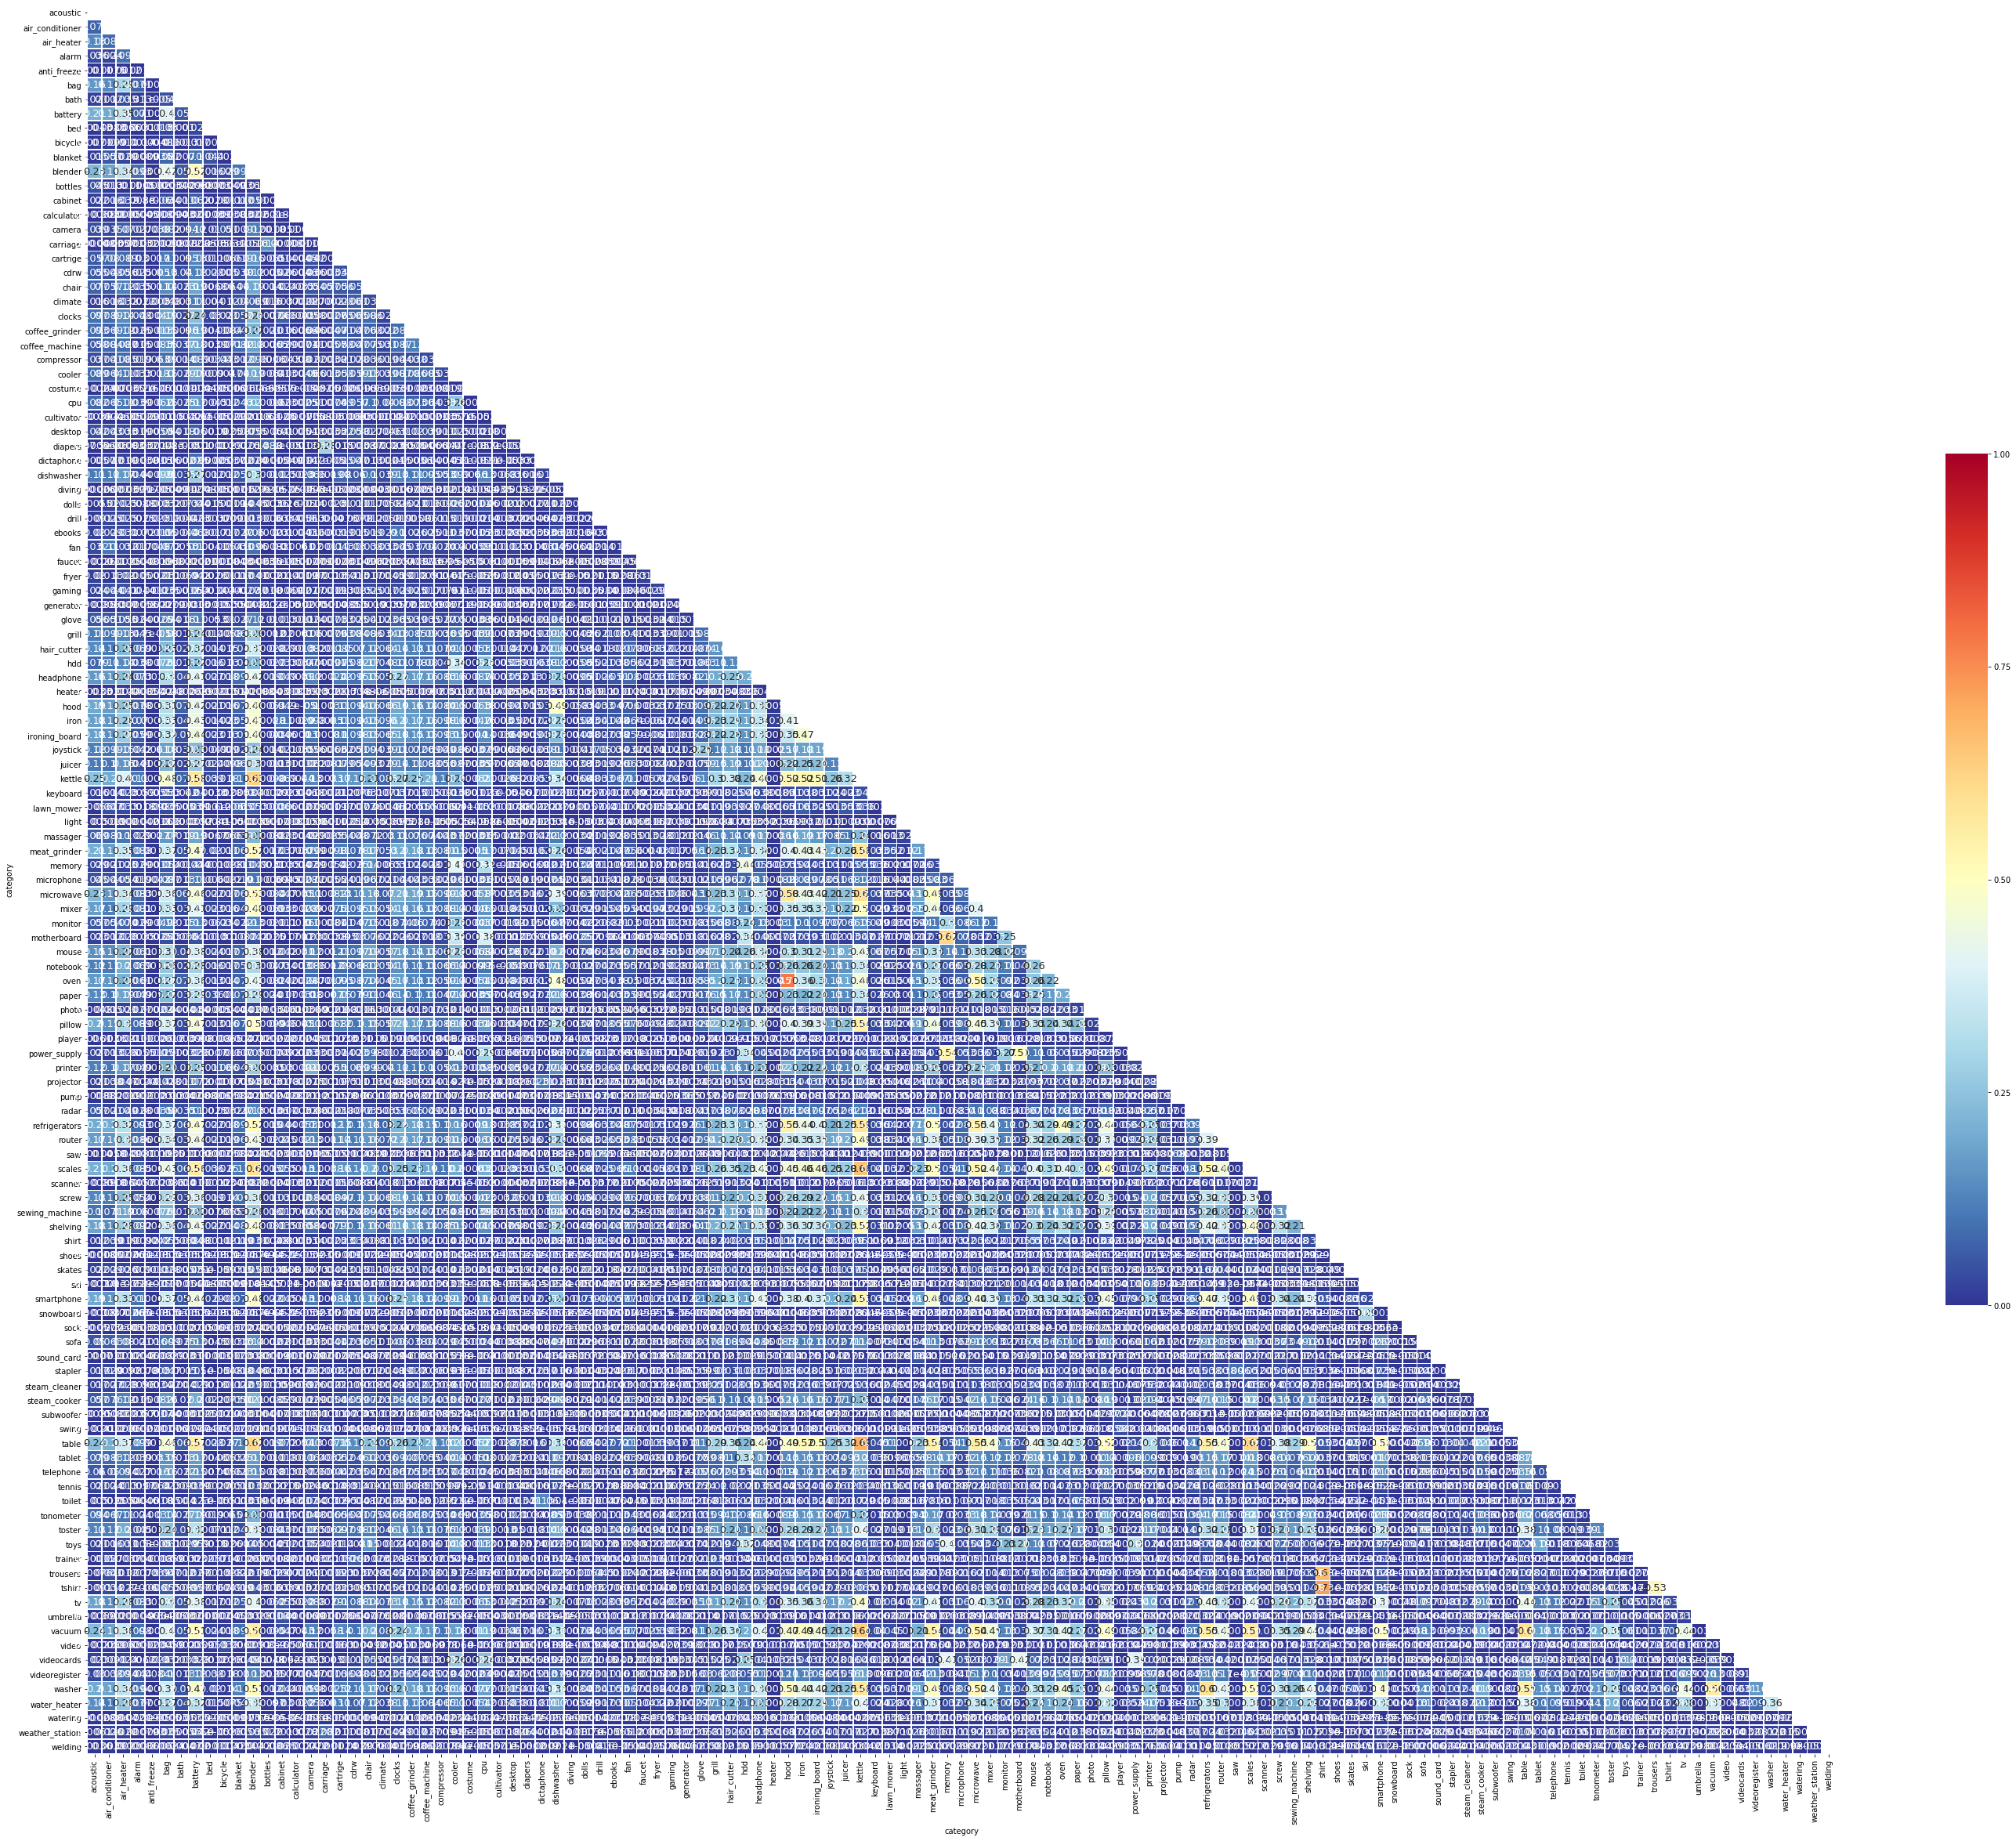

In [48]:
import seaborn as sns
from matplotlib import pyplot as plt
f, ax = plt.subplots(figsize=(50, 50))
heatmap = sns.heatmap(corr_matrix_pdf2,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'RdYlBu_r',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [0 , 0.25, 0.5, 0.75 , 1]},
                      vmin = 0,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 13}
                     )

#### 결과 분석 0.58 <=
- (1) kettle & blender
- (2) kettle & battery
- (3) kettle & washer
- (4) kettle & vacuum
- (5) kettle & table
- (6) kettle & scales
- (7) kettle & refrigerators
- (8) kettle & meet grinder
- (9) kettle & microwave
- (10) oven & hood
- (11) microwave & hood
- (12) table & blender
- (13) table & scales
- (14) table & vacuum
- (15) shirt & trouser
- (16) shirt & trouser
- (17) washer & refrigerators
- (18) washer & vacuum

In [50]:
# Function to get Highest Corr Category list
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=20):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print(get_top_abs_correlations(pdf2, 30))

category       category     
hood           oven             0.784666
shirt          tshirt           0.719273
kettle         table            0.693112
shirt          trousers         0.675616
kettle         scales           0.658415
               vacuum           0.637947
blender        kettle           0.629791
scales         table            0.624353
memory         motherboard      0.618283
blender        table            0.616351
kettle         microwave        0.598973
refrigerators  washer           0.597079
blender        scales           0.595378
table          vacuum           0.595217
kettle         refrigerators    0.589131
battery        kettle           0.582528
hood           microwave        0.579407
kettle         washer           0.577439
               meat_grinder     0.577030
battery        table            0.574181
scales         vacuum           0.572193
battery        scales           0.564328
vacuum         washer           0.561989
blender        vacuum       

In [51]:
df_cat = df[df['category'].isin(['hood', 'oven', 'shirt','tshirt',
                                'kettle', 'table', 'trousers','scales',
                                'vacuum', 'blender', 'memory','motherboard',
                                'microwave','refrigerators','washer',
                                'battery', 'meat_grinder'])]

pdf_cat = pd.pivot_table(df_cat,
                     index = 'user_id',
                     columns = 'category',
                     values = 'price',
                     aggfunc = 'sum')

pdf_cat

category     battery  blender  hood  kettle  meat_grinder  memory  microwave  \
user_id                                                                        
440099840.0      NaN      NaN   NaN     NaN           NaN     NaN        NaN   
440121600.0      NaN      NaN   NaN     NaN           NaN     NaN      43.96   
440881408.0      NaN      NaN   NaN     NaN           NaN     NaN        NaN   
440936192.0      NaN      NaN   NaN     NaN           NaN     NaN        NaN   
440936704.0      NaN      NaN   NaN     NaN           NaN     NaN        NaN   
...              ...      ...   ...     ...           ...     ...        ...   
514865664.0      NaN      NaN   NaN     NaN           NaN     NaN        NaN   
514865920.0      NaN      NaN   NaN     NaN           NaN     NaN        NaN   
514874624.0      NaN      NaN   NaN     NaN           NaN     NaN        NaN   
514876160.0      NaN      NaN   NaN     NaN           NaN     NaN        NaN   
514876928.0      NaN      NaN   NaN     NaN           NaN     NaN        NaN   

category     motherboard  oven  refrigerators  scales  shirt  table  trousers  \
user_id                                                                         
440099840.0          NaN   NaN        1715.23     NaN    NaN    NaN       NaN   
440121600.0          NaN   NaN            NaN     NaN    NaN    NaN       NaN   
440881408.0          NaN   NaN            NaN     NaN    NaN    NaN       NaN   
440936192.0          NaN   NaN            NaN     NaN    NaN    NaN       NaN   
440936704.0          NaN   NaN        3055.50     NaN    NaN    NaN       NaN   
...                  ...   ...            ...     ...    ...    ...       ...   
514865664.0          NaN   NaN            NaN     NaN    NaN    NaN       NaN   
514865920.0          NaN   NaN         291.64     NaN    NaN    NaN       NaN   
514874624.0          NaN   NaN         324.02     NaN    NaN    NaN       NaN   
514876160.0          NaN   NaN            NaN     NaN    NaN    NaN       NaN   
514876928.0          NaN   NaN            NaN     NaN    NaN    NaN       NaN   

category     tshirt  vacuum  washer  
user_id                              
440099840.0     NaN     NaN     NaN  
440121600.0     NaN     NaN     NaN  
440881408.0     NaN  208.31  358.77  
440936192.0     NaN  101.83     NaN  
440936704.0     NaN  104.14  715.23  
...             ...     ...     ...  
514865664.0     NaN   64.79     NaN  
514865920.0     NaN     NaN     NaN  
514874624.0     NaN     NaN     NaN  
514876160.0     NaN     NaN  578.68  
514876928.0     NaN   43.96  324.05  

[34261 rows x 17 columns]

In [52]:
pdf_cat = pdf_cat.replace(np.nan, 0)
pdf_cat

category     battery  blender  hood  kettle  meat_grinder  memory  microwave  \
user_id                                                                        
440099840.0      0.0      0.0   0.0     0.0           0.0     0.0       0.00   
440121600.0      0.0      0.0   0.0     0.0           0.0     0.0      43.96   
440881408.0      0.0      0.0   0.0     0.0           0.0     0.0       0.00   
440936192.0      0.0      0.0   0.0     0.0           0.0     0.0       0.00   
440936704.0      0.0      0.0   0.0     0.0           0.0     0.0       0.00   
...              ...      ...   ...     ...           ...     ...        ...   
514865664.0      0.0      0.0   0.0     0.0           0.0     0.0       0.00   
514865920.0      0.0      0.0   0.0     0.0           0.0     0.0       0.00   
514874624.0      0.0      0.0   0.0     0.0           0.0     0.0       0.00   
514876160.0      0.0      0.0   0.0     0.0           0.0     0.0       0.00   
514876928.0      0.0      0.0   0.0     0.0           0.0     0.0       0.00   

category     motherboard  oven  refrigerators  scales  shirt  table  trousers  \
user_id                                                                         
440099840.0          0.0   0.0        1715.23     0.0    0.0    0.0       0.0   
440121600.0          0.0   0.0           0.00     0.0    0.0    0.0       0.0   
440881408.0          0.0   0.0           0.00     0.0    0.0    0.0       0.0   
440936192.0          0.0   0.0           0.00     0.0    0.0    0.0       0.0   
440936704.0          0.0   0.0        3055.50     0.0    0.0    0.0       0.0   
...                  ...   ...            ...     ...    ...    ...       ...   
514865664.0          0.0   0.0           0.00     0.0    0.0    0.0       0.0   
514865920.0          0.0   0.0         291.64     0.0    0.0    0.0       0.0   
514874624.0          0.0   0.0         324.02     0.0    0.0    0.0       0.0   
514876160.0          0.0   0.0           0.00     0.0    0.0    0.0       0.0   
514876928.0          0.0   0.0           0.00     0.0    0.0    0.0       0.0   

category     tshirt  vacuum  washer  
user_id                              
440099840.0     0.0    0.00    0.00  
440121600.0     0.0    0.00    0.00  
440881408.0     0.0  208.31  358.77  
440936192.0     0.0  101.83    0.00  
440936704.0     0.0  104.14  715.23  
...             ...     ...     ...  
514865664.0     0.0   64.79    0.00  
514865920.0     0.0    0.00    0.00  
514874624.0     0.0    0.00    0.00  
514876160.0     0.0    0.00  578.68  
514876928.0     0.0   43.96  324.05  

[34261 rows x 17 columns]

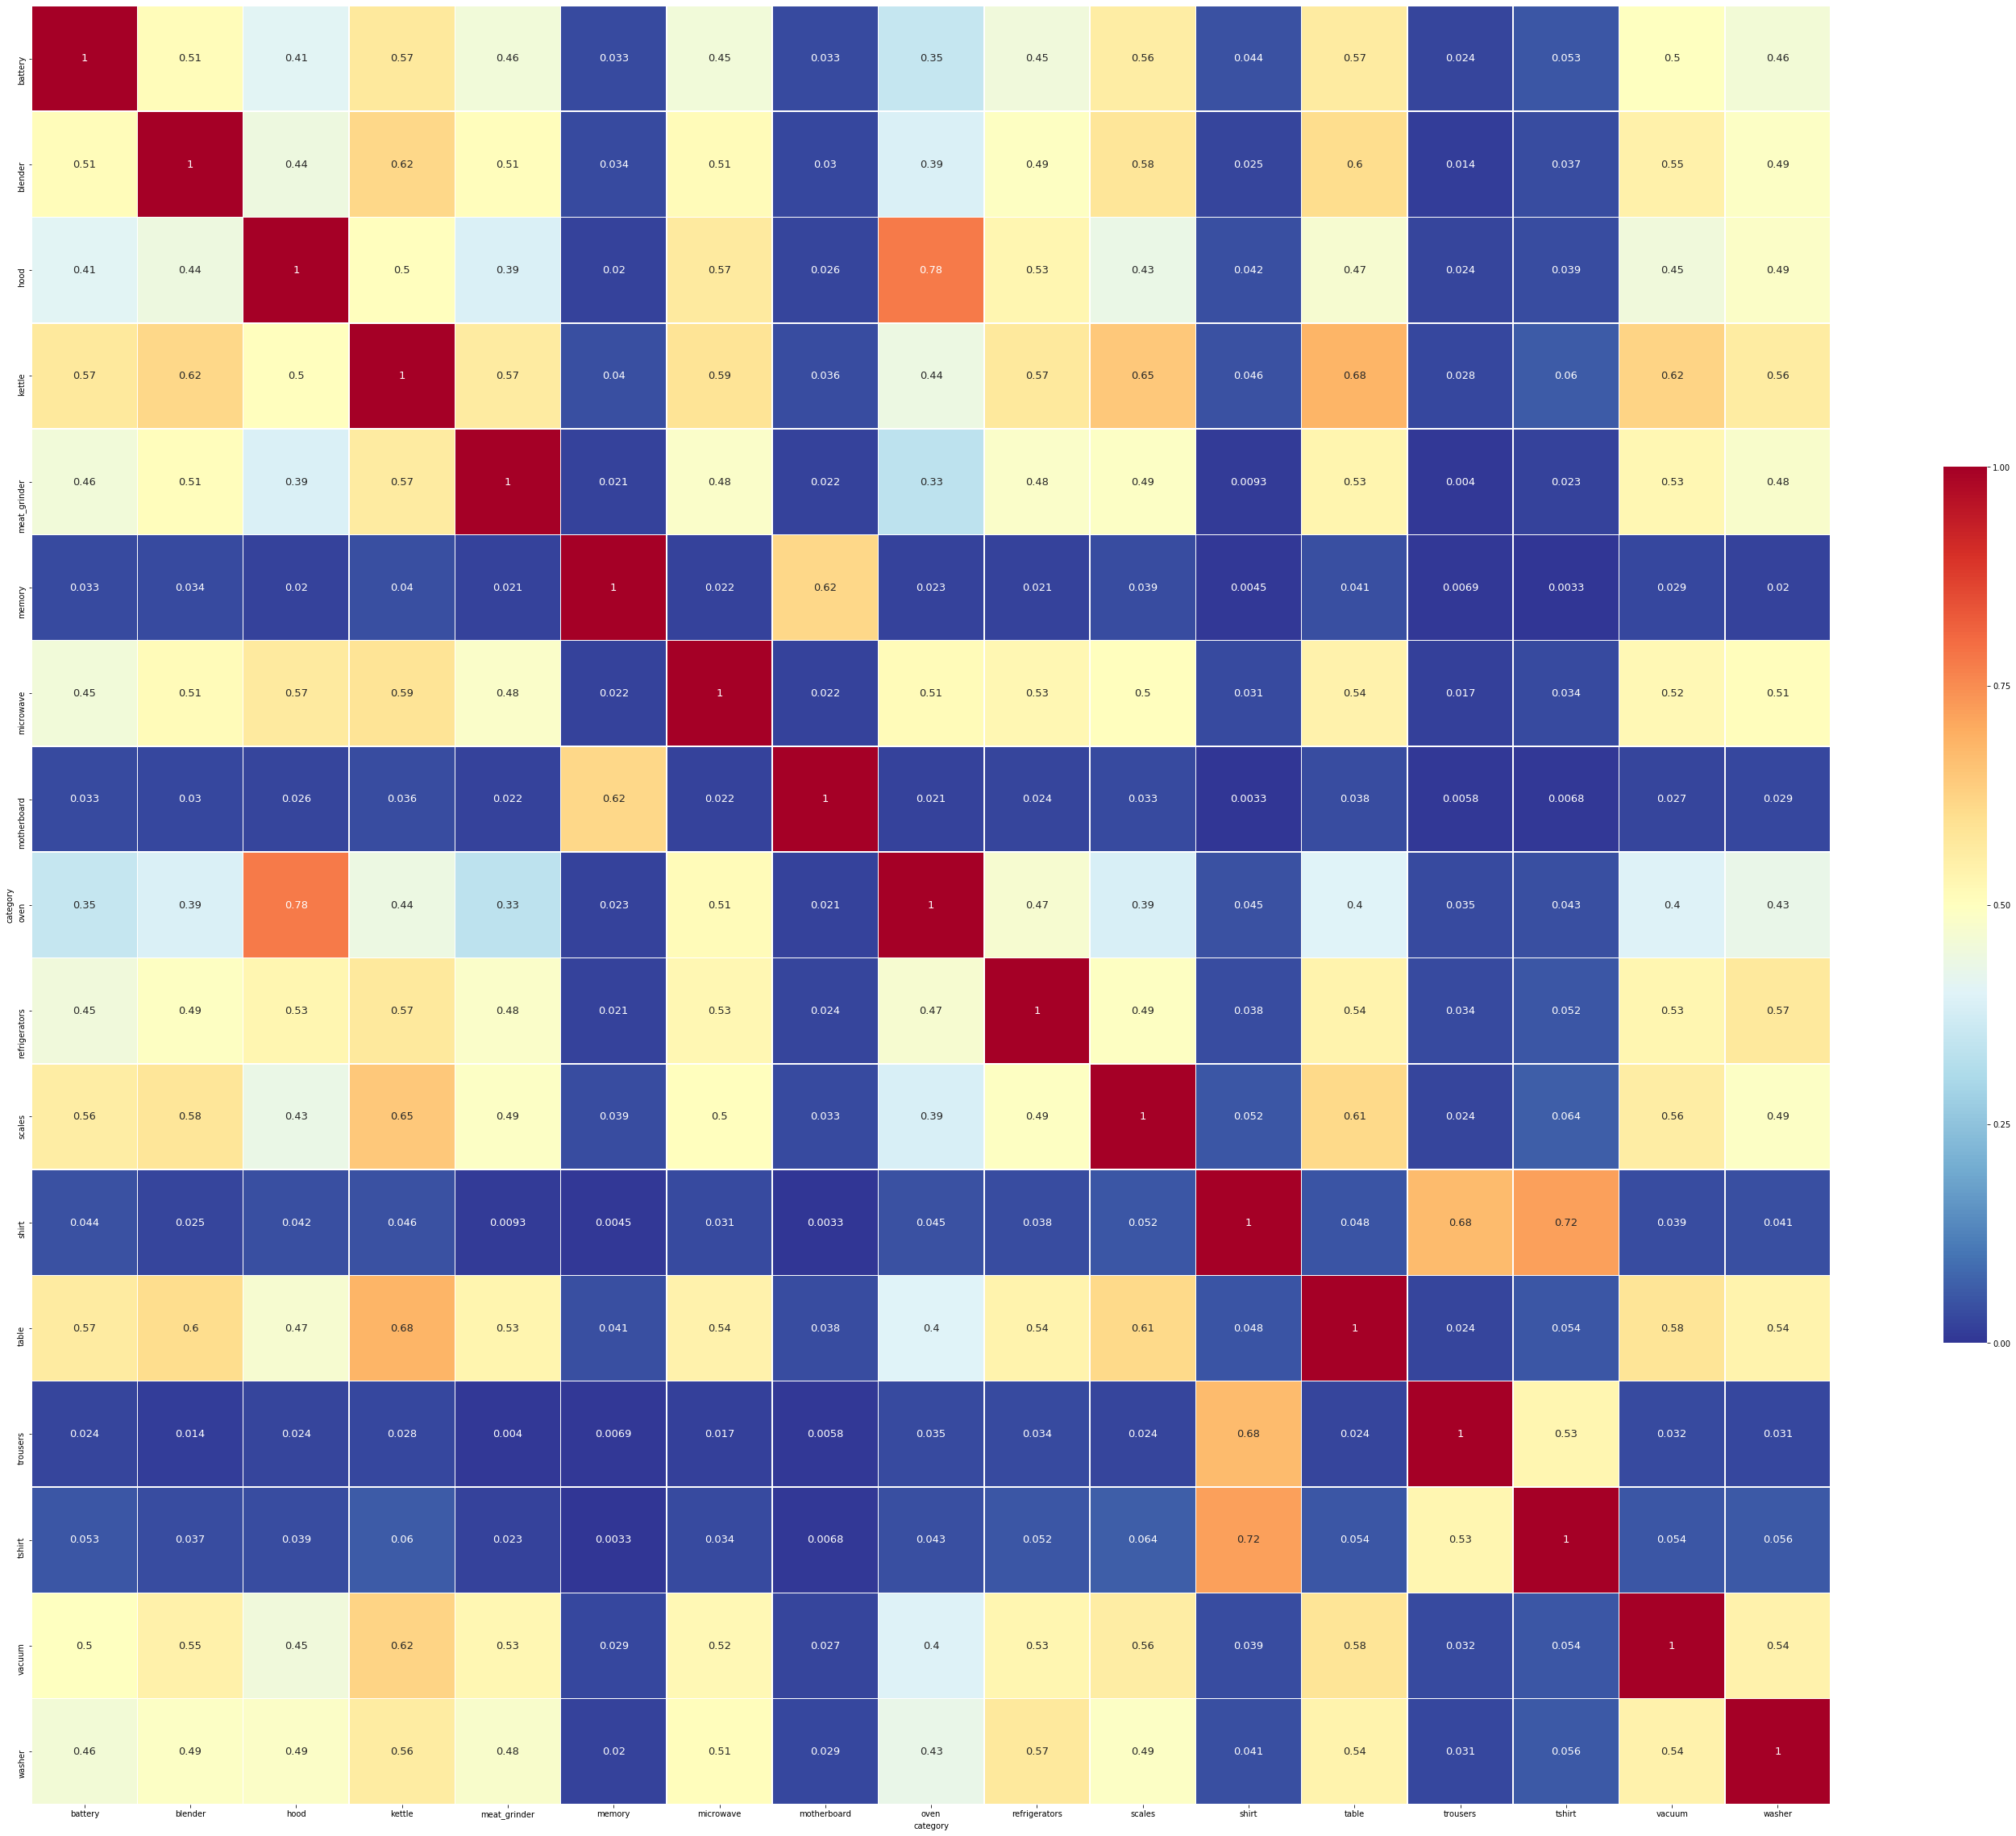

In [55]:
f, ax = plt.subplots(figsize=(50, 50))
heatmap = sns.heatmap(pdf_cat.corr().abs(),
                      square = True,
                      linewidths = .5,
                      cmap = 'RdYlBu_r',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [0 , 0.25, 0.5, 0.75 , 1]},
                      vmin = 0,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 13}
                     )